You’re now in the data wrangling stage of your second capstone. Use the outline below
as a reminder of what steps to follow, but be aware that your exact steps may change
based on the issues you surface about your particular dataset and project.
Need a data wrangling refresher? We encourage you to review the data wrangling work
you did during the guided capstone earlier in this course.
Please note that the time estimates associated with this step of your capstone are
approximated — you may take more or less time based on the complexity of your data.

**Data Wrangling:**

All of the following steps should be performed in a Jupyter notebook with adequate
notation and structure so that your mentor can understand the process you followed.

    ● Data Collection
        ○ Goal: Organize your data to streamline the next steps of your
            capstone
        ○ Time estimate: 1-2 hours
            ■ Data loading
            ■ Data joining
            ■ Hint: Data Collection will require the use of the pandas library,
                and functions like read_csv(), depending on the type of data
                you want to read in!
            ■ Hint: when adding one dataset to another, make sure you use
                the right function: you might want to merge, join, or
                concatenate.

    ● Data Organization
        ○ Goal: Create a file structure and add your work to the GitHub
            repository you’ve created for this project.
        ○ Time estimate: 1-2 hours
            ■ File structure
            ■ GitHub
            ■ Hint: the glob library could come in handy here…
            ■ Remind yourself of why GitHub is useful. What are the main
                motivations for making a GitHub repository?

    ● Data Definition
        ○ Goal: Gain an understanding of your data features to inform the
            next steps of your project.
        ○ Time estimate: 1-2 hours
            ■ Column names
            ■ Data types
            ■ Description of the columns
            ■ Counts and percents unique values
            ■ Ranges of values
                - Hint: here are some useful questions to ask yourself during this
                    process:
                - Do your column names correspond to what those columns
                    store?
                - Check the data types of your columns. Are they sensible?
                - Calculate summary statistics for each of your columns, such
                    as mean, median, mode, standard deviation, range, and
                    number of unique values. What does this tell you about your
                    data? What do you now need to investigate?

In [1]:
import os
os.chdir(r'C:/Users/vinhm/Springboard/Capstones/Capstone 2 Brain Tumor Classification/Data/brainTumorDataPublic_1-3064')

import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import pandas as pd
import mat73
import random
from random import sample

Data citation:
Cheng, Jun. "brain tumor dataset." Figshare. Dataset posted on 02/04/2017. https://figshare.com/articles/dataset/brain_tumor_dataset/1512427

This brain tumor dataset containing 3064 T1-weighted contrast-inhanced images
from 233 patients with three kinds of brain tumor: meningioma (708 slices), 
glioma (1426 slices), and pituitary tumor (930 slices). Due to the file size
limit of repository, we split the whole dataset into 4 subsets, and achive 
them in 4 .zip files with each .zip file containing 766 slices.The 5-fold
cross-validation indices are also provided.

-----
This data is organized in matlab data format (.mat file). Each file stores a struct
containing the following fields for an image:

-----
This data was used in the following paper:

1. Cheng, Jun, et al. "Enhanced Performance of Brain Tumor Classification via Tumor Region Augmentation
and Partition." PloS one 10.10 (2015).

2. Cheng, Jun, et al. "Retrieval of Brain Tumors by Adaptive Spatial Pooling and Fisher Vector 
Representation." PloS one 11.6 (2016). Matlab source codes are available on github 
https://github.com/chengjun583/brainTumorRetrieval

-----
Jun Cheng
School of Biomedical Engineering
Southern Medical University, Guangzhou, China
Email: chengjun583@qq.com



**File Directory:**

In [2]:
files = pd.DataFrame(glob('*'))
files.columns = ['File Locations']
files = files.values.tolist()
files = random.sample(files, 50)
# files

Test Print 'image':

In [3]:
# for x in files:
#     data_dict = mat73.loadmat(x[0])
#     print(data_dict['cjdata'].keys())
#     image = data_dict['cjdata']['image']
#     print(image)

In [4]:
# csvwrite('FileName.csv', FileData.M);

Test load data 'image':

In [5]:
with h5py.File('0001.mat', 'r') as f:
    print("Data Keys: ", list(f['cjdata'].keys()))
    image = list(f['cjdata']['image'])
    print(np.array(image))

Data Keys:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


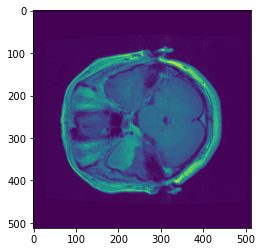

In [6]:
imgplot = plt.imshow(image)
plt.show()


Load all data in directory:

**'PID':**

cjdata.PID: patient ID

In [7]:
for x in files:
    with h5py.File(x[0], 'r') as f:
        print("File Name: ", x)
        print("Data Type: ", list(f['cjdata'].keys()))
        PID = list(f['cjdata']['PID'])
        print(np.array(PID).T)

File Name:  ['2498.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[77 82 48 50 52 55 56 48 69]]
File Name:  ['2658.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[77 82 48 50 57 50 48 57 69]]
File Name:  ['0414.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[57 55 56 55 53]]
File Name:  ['3023.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[77 82 48 51 52 57 57 55]]
File Name:  ['2505.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[77 82 48 50 54 49 55 53 69]]
File Name:  ['2698.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[77 82 48 51 50 51 50 50 67]]
File Name:  ['2937.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[77 82 48 53 49 54 52 52]]
File Name:  ['2523.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[77 82 48 52 48 50 52 48 67]]
File Name:  ['0407.mat']
Data Type:  ['PID

**'image':**

cjdata.image: image data

In [8]:
for x in files:
    with h5py.File(x[0], 'r') as f:
        print("File Name: ", x)
        print("Data Type: ", list(f['cjdata'].keys()))
        image = list(f['cjdata']['image'])
        print(np.array(image))

File Name:  ['2498.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
File Name:  ['2658.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
File Name:  ['0414.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
File Name:  ['3023.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 4 3 0]
 [0 0 1 ... 4 4 0]
 [0 0 1 ... 4 4 0]]
File Name:  ['2505.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0

File Name:  ['2414.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
File Name:  ['0923.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
File Name:  ['0735.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
File Name:  ['2546.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
File Name:  ['2033.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0

**'label':**

cjdata.label: 1 for meningioma, 2 for glioma, 3 for pituitary tumor

In [9]:
for x in files:
    with h5py.File(x[0], 'r') as f:
        print("File Name: ", x)
        print("Data Type: ", list(f['cjdata'].keys()))
        label = list(f['cjdata']['label'])
        print(label)

File Name:  ['2498.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[array([2.])]
File Name:  ['2658.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[array([2.])]
File Name:  ['0414.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[array([1.])]
File Name:  ['3023.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[array([2.])]
File Name:  ['2505.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[array([2.])]
File Name:  ['2698.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[array([2.])]
File Name:  ['2937.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[array([2.])]
File Name:  ['2523.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[array([2.])]
File Name:  ['0407.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[array([1.])]
File Name:  ['2650.mat']
Data Type:  ['PID', 'image', '

**'tumorBorder':**

cjdata.tumorBorder: a vector storing the coordinates of discrete points on tumor border.
		For example, [x1, y1, x2, y2,...] in which x1, y1 are planar coordinates on tumor border.
		It was generated by manually delineating the tumor border. So we can use it to generate
		binary image of tumor mask.

In [10]:
for x in files:
    with h5py.File(x[0], 'r') as f:
        print("File Name: ", x)
        print("Data Type: ", list(f['cjdata'].keys()))
        tumorBorder = list(f['cjdata']['tumorBorder'])
        print(tumorBorder)

File Name:  ['2498.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[array([362.14634146, 188.20905923, 341.63066202, 201.58885017,
       332.71080139, 215.86062718, 330.03484321, 244.40418118,
       325.57491289, 247.08013937, 305.95121951, 239.05226481,
       296.13937282, 231.91637631, 296.13937282, 212.29268293,
       313.97909408, 202.48083624, 332.71080139, 192.66898955,
       344.30662021, 181.07317073, 352.33449477, 180.18118467,
       365.71428571, 175.72125436, 365.71428571, 179.28919861])]
File Name:  ['2658.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[array([179.55884458,  84.36415555, 141.36696335, 106.02522251,
       123.12606485, 125.40617717, 115.71569984, 153.33755299,
       119.13586831, 176.13867611, 121.9860087 , 190.95940614,
       132.81654218, 192.09946229, 151.05744068, 178.41878842,
       163.59805839, 179.55884458, 168.15828302, 189.81934998,
       172.71850764, 216.04064157, 182.40898497, 232.00142

File Name:  ['2630.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[array([254.77210926, 206.27855437, 271.41915049, 213.51639839,
       289.51376052, 214.96396719, 305.43701735, 216.41153599,
       321.36027418, 210.62126078, 324.25541178, 191.80286635,
       313.39864577, 166.4704123 , 295.30403573, 151.99472427,
       276.4856413 , 144.03309586, 261.28616887, 144.75688026,
       251.87697165, 157.78499948, 244.63912764, 172.98447191,
       234.50614602, 183.11745353, 234.50614602, 196.14557275,
       248.98183405, 205.55476997, 259.11481567, 208.44990758])]
File Name:  ['0675.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[array([355.76107931, 263.82989775, 345.68642927, 276.42321029,
       345.05676365, 285.8681947 , 348.83475741, 297.20217599,
       353.2424168 , 310.42515416, 359.53907307, 319.87013856,
       368.98405748, 322.38880107, 380.31803876, 317.98114168,
       386.61469503, 304.75816351, 393.54101693, 284.60886

**'tumorMask':**

cjdata.tumorMask: a binary image with 1s indicating tumor region

In [11]:
for x in files:
    with h5py.File(x[0], 'r') as f:
        print("File Name: ", x)
        print("Data Type: ", list(f['cjdata'].keys()))
        tumorMask = list(f['cjdata']['tumorMask'])
        print(np.array(tumorMask))

File Name:  ['2498.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
File Name:  ['2658.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
File Name:  ['0414.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
File Name:  ['3023.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
File Name:  ['2505.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0

File Name:  ['0412.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
File Name:  ['1333.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
File Name:  ['0287.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
File Name:  ['1501.mat']
Data Type:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**'Combined image with tumorMask':**

cjdata.tumorMask: a binary image with 1s indicating tumor region

    ● Data Cleaning
        ○ Goal: Clean up the data in order to prepare it for the next steps of
            your project.
        ○ Time estimate: 1-2 hours
            ■ NA or missing values
            ■ Duplicates
                - Hint: don’t forget about the following awesome Python functions for data
                    cleaning, which make life a whole lot easier:
                - loc[] - filter your data by label
                - iloc[] - filter your data by indexes
                - apply() - execute a function across an axis of a DataFrame
                - drop() - drop columns from a DataFrame
                - is_unique() - check if a column is a unique identifier
                - Series methods, such as str.contains(), which can be used to check if
                    a certain substring occurs in a string of a Series, and str.extract(),
                    which can be used to extract capture groups with a certain regex (or
                    regular expression) pattern
                - numPy methods like .where(), to clean columns. Recall that such
                    methods have the structure: np.where(condition, then, else)
                - DataFrame methods to check for null values, such as
                    df.isnull().values.any()


- And don’t forget that even the best data scientists and programmers Google things every
day. Start with the idea: what you want to do with your data? Break it down into bitesize
steps. Then, if you’re not sure about a certain step, look through the data wrangling
resources included in the course or execute a well-written Google Search, looking at
trusted resources like StackOverflow